**Sales Forecasting**


**Problem statement:**

 In ever-changing competitive market conditions, there is a need to make correct
decisions and plans for future events related to business like sales, production, and
many more. The effectiveness of a decision taken by business managers is influenced by
the accuracy of the models used. Demand is the most important aspect of a business's
ability to achieve its objectives. Many decisions in business depend on demand, like
production, sales, and staff requirements. Forecasting is necessary for business at both
international and domestic levels.

**Problem objective:**
 Fresh Analytics, a data analytics company, aims to comprehend and predict the demand
for various items across restaurants. The primary goal of the project is to determine the
sales of items across different restaurants over the years

**Data Science**


**Preliminary analysis:**

a. Import the datasets into the Python environment

In [47]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler


In [48]:
# Read the CSV files
items = pd.read_csv("./sample_data/items.csv")
sales = pd.read_csv("./sample_data/sales.csv")
restaurants = pd.read_csv("./sample_data/resturants.csv")


b. Examine the dataset's shape and structure, and look out for any outlier

In [49]:
print(restaurants.shape)
print(restaurants.info())
print(restaurants.describe())

print(sales.shape)
print(sales.info())
print(sales.describe())

print(items.shape)
print(items.info())
print(items.describe())


(6, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None
             id
count  6.000000
mean   3.500000
std    1.870829
min    1.000000
25%    2.250000
50%    3.500000
75%    4.750000
max    6.000000
(109600, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB
None
             item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
me

c. Merge the datasets into a single dataset that includes the date, item id, price, item count, item
names, kcal values, store id, and store name

In [50]:
# Function to plot boxplot and histogram in adjacent columns
def plot_box_hist(final_df):
    # Select numeric columns (excluding IDs)
    numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    id_cols = ['item_id', 'store_id']
    numeric_cols = [col for col in numeric_cols if col not in id_cols]

    # Create a figure for each numeric column
    for col in numeric_cols:
        # Set up a 1x2 grid (1 row, 2 columns) for each plot
        fig, axes = plt.subplots(1, 2, figsize=(10, 6))

        # Boxplot in the first column
        sns.boxplot(data=final_df, x=col, ax=axes[0])
        axes[0].set_title(f'Box Plot of {col}')
        axes[0].set_xlabel(col)

        # Histogram + KDE in the second column
        sns.histplot(final_df[col], kde=True, bins=30, color='skyblue', ax=axes[1])
        sk = skew(final_df[col].dropna())
        axes[1].set_title(f'Histogram of {col} (Skewness: {sk:.2f})')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequency')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

         date  item_id  price  item_count                        item_name  \
0  2019-01-01        3  29.22         2.0                Sweet Fruity Cake   
1  2019-01-01        4  26.42        22.0  Amazing Steak Dinner with Rolls   
2  2019-01-01       12   4.87         7.0             Fantastic Sweet Cola   
3  2019-01-01       13   4.18        12.0          Sweet Frozen Soft Drink   
4  2019-01-01       16   3.21       136.0             Frozen Milky Smoothy   

   kcal  item_cost  store_id   store_name  
0   931      29.22         1  Bob's Diner  
1   763      26.42         1  Bob's Diner  
2   478       4.87         1  Bob's Diner  
3   490       4.18         1  Bob's Diner  
4   284       3.21         1  Bob's Diner  
(109600, 9)
date          0
item_id       0
price         0
item_count    0
item_name     0
kcal          0
item_cost     0
store_id      0
store_name    0
dtype: int64
Series([], dtype: int64)
Total duplicate rows: 0
Numeric columns without IDs: ['price', 'item_coun

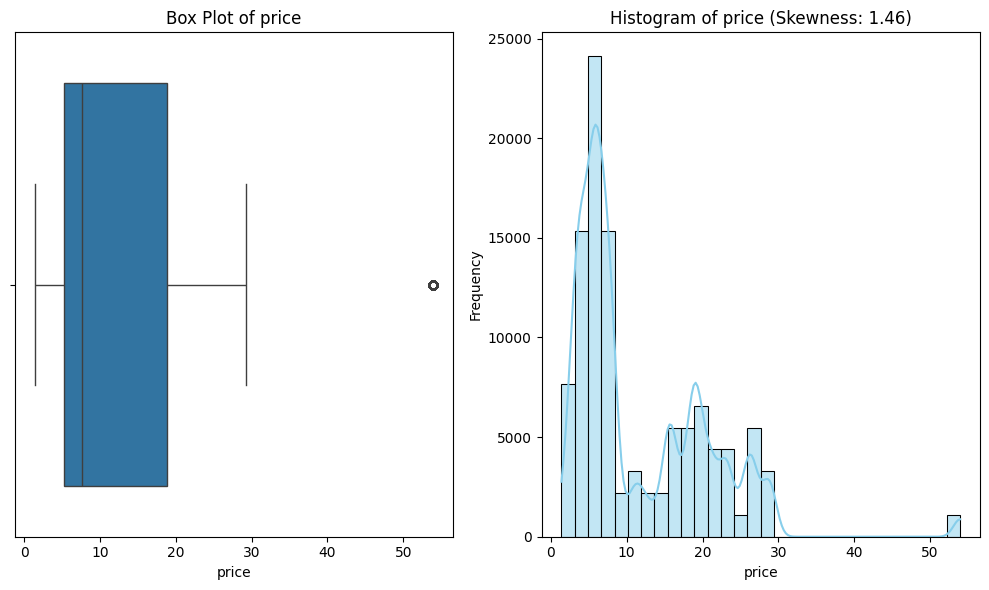

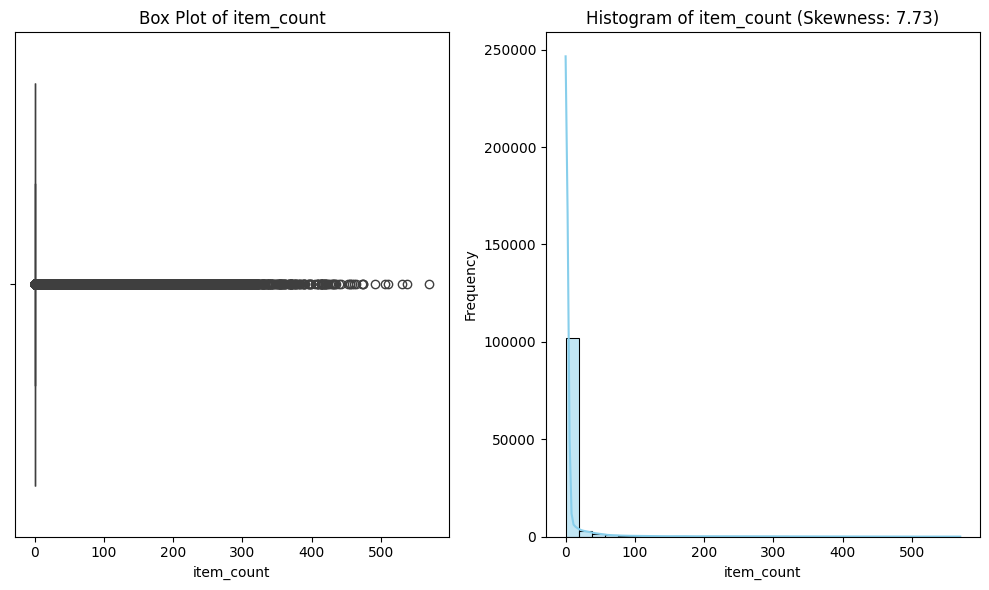

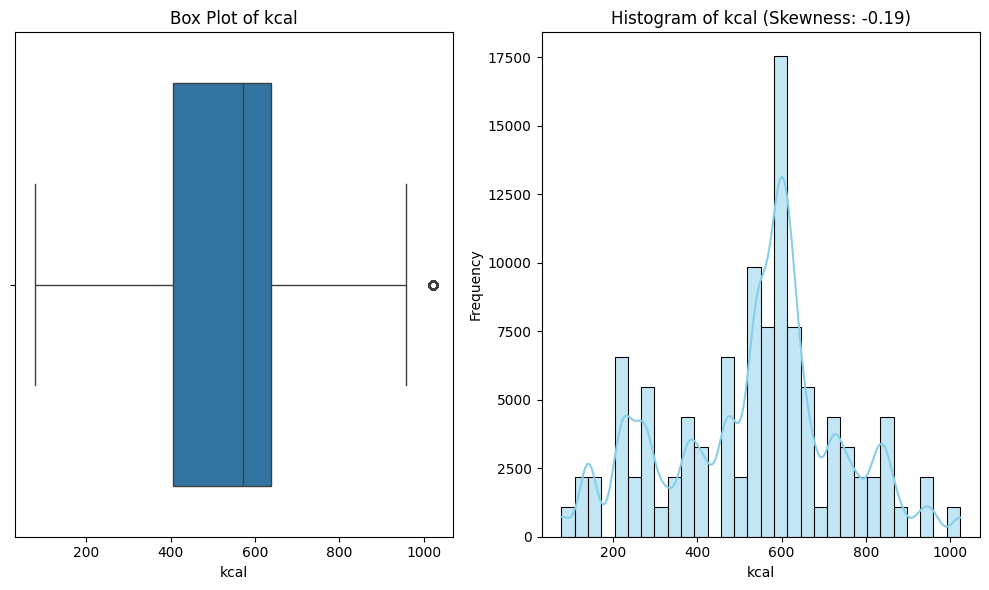

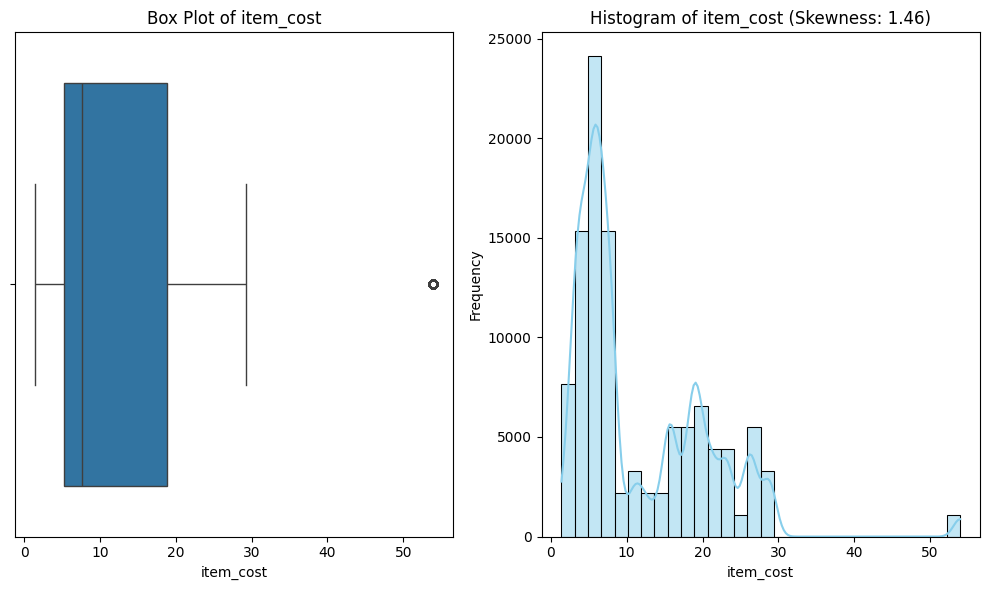

In [51]:
# Assuming the store identifier in df_items is indeed 'store_id'
items = items.rename(columns={'id': 'item_id', 'name': 'item_name', 'cost': 'item_cost'})
restaurants = restaurants.rename(columns={'id': 'store_id', 'name': 'store_name'})

# Merge sales_df with items_df, bringing in store_id
merged_df = pd.merge(sales, items[['item_id', 'item_name', 'kcal', 'item_cost', 'store_id']], on='item_id', how='inner')



# Merge the result with stores_df
final_df = pd.merge(merged_df, restaurants[['store_id', 'store_name']], on='store_id', how='inner')

print(final_df.head())
print(final_df.shape)


# Check for any nulls in the entire DataFrame
print(final_df.isnull().sum())
print(final_df.isnull().sum()[final_df.isnull().sum() > 0])

#Check duplicates
duplicate_rows = final_df[final_df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")




# identifier columns
# Step 1: Get all numeric columns (int and float)
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Remove identifier columns
id_cols = ['item_id', 'store_id']
numeric_cols = [col for col in numeric_cols if col not in id_cols]

print("Numeric columns without IDs:", numeric_cols)


plot_box_hist(final_df)







 **Exploratory data analysis:**

 a. Examine the overall date wise sales to understand the pattern

Skewness of 'sales': 4.68
Maximum sales value: 2224.8
    sales  sales_log
0   58.44   4.084967
1  581.24   6.366883
2   34.09   3.557916
3   50.16   3.934958
4  436.56   6.081214


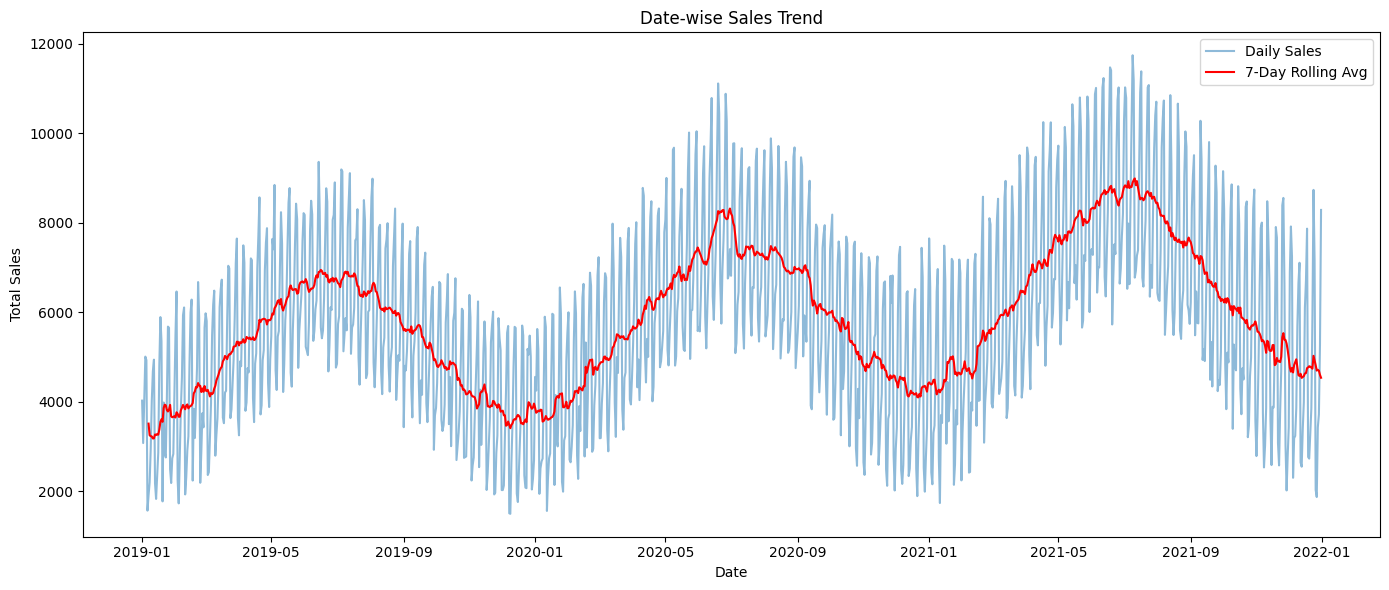

In [52]:
# Ensure 'date' is a datetime object
final_df['date'] = pd.to_datetime(final_df['date'])

# Calculate daily total sales revenue
final_df['sales'] = final_df['price'] * final_df['item_count']

#normalize the data
from scipy.stats import skew

# Drop NaN values to avoid errors
sales_skew = skew(final_df['sales'].dropna())

print(f"Skewness of 'sales': {sales_skew:.2f}")

max_sales = final_df['sales'].max()
print(f"Maximum sales value: {max_sales}")


# Add 1 to avoid log(0) for normalize sales data
final_df['sales_log'] = np.log1p(final_df['sales'])
# Step 3: Preview the result
print(final_df[['sales', 'sales_log']].head())


daily_sales = final_df.groupby('date')['sales'].sum().reset_index()


# Optional: Add rolling average for smoother trend
daily_sales['7_day_avg'] = daily_sales['sales'].rolling(window=7).mean()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Daily Sales', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['7_day_avg'], label='7-Day Rolling Avg', color='red')
plt.title('Date-wise Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


b. Find out how sales fluctuate across different days of the week

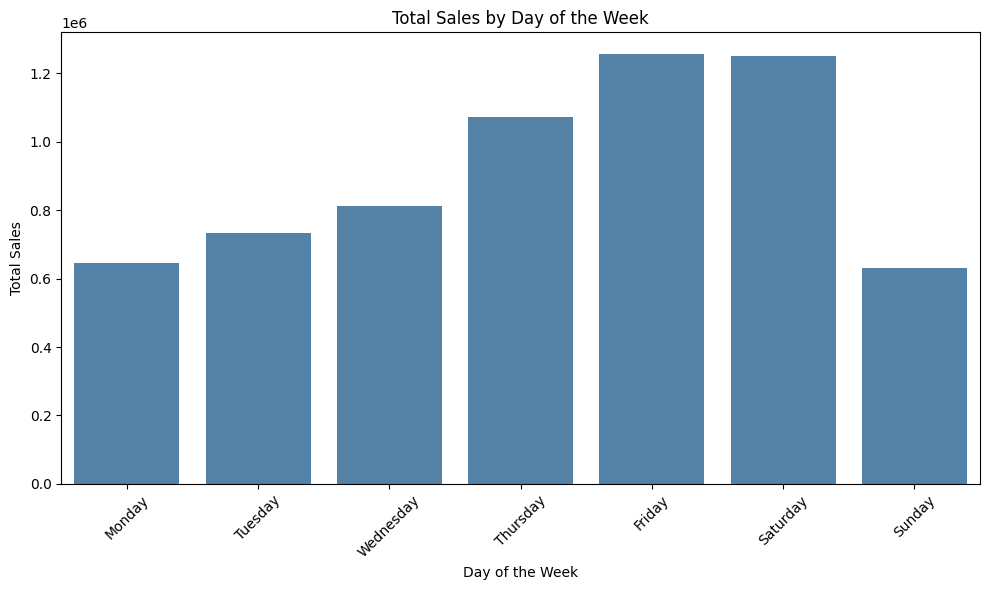

In [53]:
# Create a weekday column (0=Monday, 6=Sunday)
final_df['weekday'] = final_df['date'].dt.day_name()

# Aggregate sales by weekday
weekday_sales = final_df.groupby('weekday')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, color='steelblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


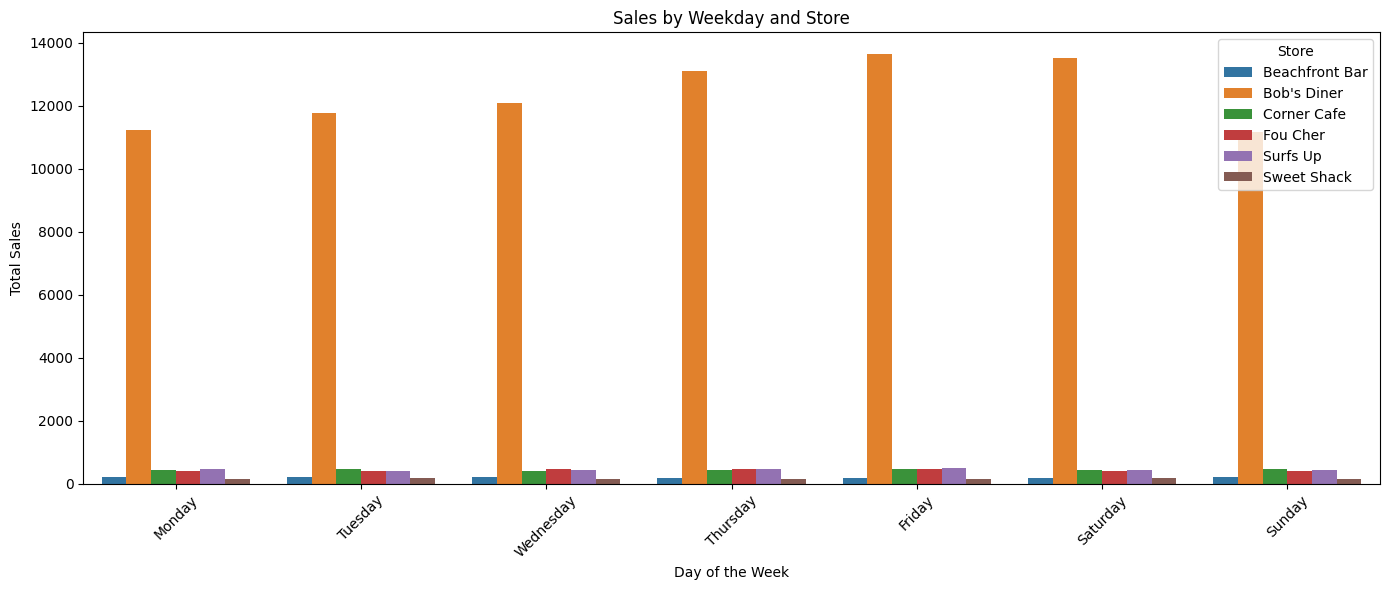

In [56]:
# Group by weekday and store, then sum sales
weekday_store_sales = (
    final_df.groupby(['store_name', 'weekday'])['sales_log']
    .sum()
    .reset_index()
)

# Ensure weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_store_sales['weekday'] = pd.Categorical(weekday_store_sales['weekday'], categories=weekday_order, ordered=True)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=weekday_store_sales, x='weekday', y='sales_log', hue='store_name')
plt.title('Sales by Weekday and Store')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c. Look for any noticeable trends in the sales data for different months of the year

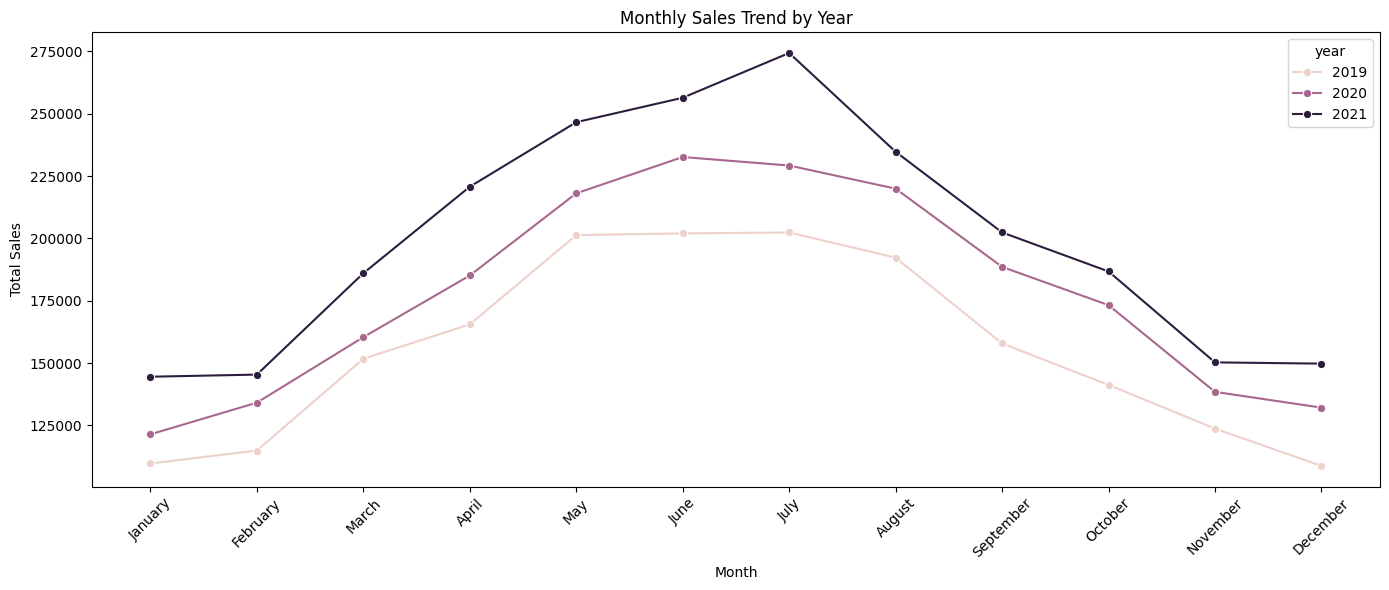

In [57]:
# Ensure date column is in datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# Add 'month' and 'year' columns
final_df['year'] = final_df['date'].dt.year
final_df['month'] = final_df['date'].dt.month
final_df['month_name'] = final_df['date'].dt.strftime('%B')



# Group by year & month for better tracking across years
monthly_sales = final_df.groupby(['year', 'month', 'month_name'])['sales'].sum().reset_index()

# Sort correctly by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['month_name'] = pd.Categorical(monthly_sales['month_name'], categories=month_order, ordered=True)

# Plot: Monthly trend across years
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month_name', y='sales', hue='year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


d. Examine the sales distribution across different quarters averaged over the years. Identify any
noticeable patterns.

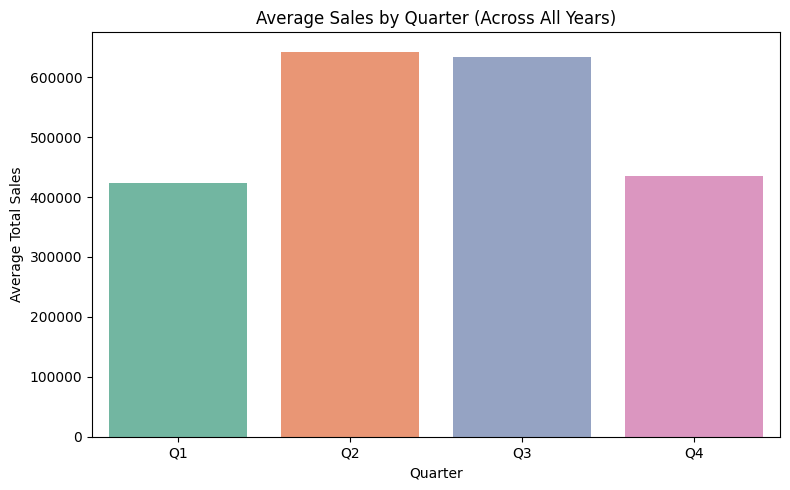

In [58]:
# Ensure 'date' is datetime
final_df['date'] = pd.to_datetime(final_df['date'])

# Add quarter and year columns
final_df['year'] = final_df['date'].dt.year
final_df['quarter'] = final_df['date'].dt.to_period('Q').astype(str)  # '2022Q1'
final_df['q_num'] = final_df['date'].dt.quarter  # For simpler grouping



# Group by year and quarter number
quarterly_sales = final_df.groupby(['year', 'q_num'])['sales'].sum().reset_index()

# Average over years
avg_quarter_sales = quarterly_sales.groupby('q_num')['sales'].mean().reset_index()
avg_quarter_sales['q_name'] = avg_quarter_sales['q_num'].apply(lambda x: f'Q{x}')

# Sort by quarter number
avg_quarter_sales = avg_quarter_sales.sort_values('q_num')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='q_name', y='sales', data=avg_quarter_sales, hue='q_name', palette='Set2', legend=False)

plt.title('Average Sales by Quarter (Across All Years)')
plt.xlabel('Quarter')
plt.ylabel('Average Total Sales')
plt.tight_layout()
plt.show()


e. Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days.

       store_name     sales_log
0     Bob's Diner  86507.781186
1        Surfs Up   3197.902354
2     Corner Cafe   3106.151032
3        Fou Cher   3083.540646
4  Beachfront Bar   1436.661542
5     Sweet Shack   1169.643676


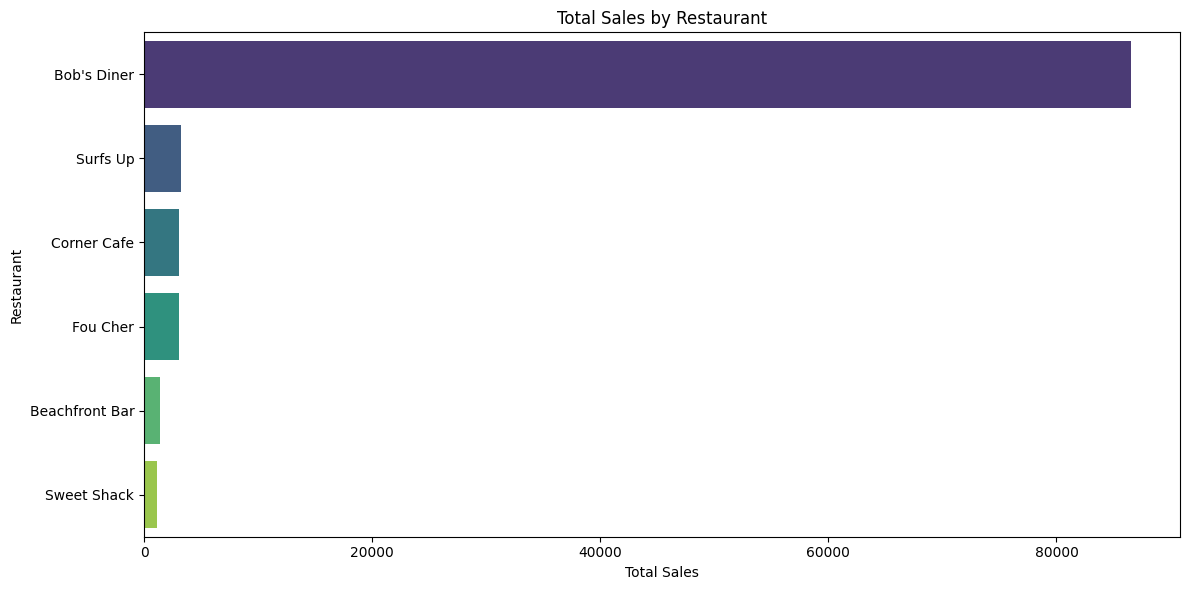

In [59]:
# Total sales per restaurant
restaurant_sales = final_df.groupby('store_name')['sales_log'].sum().sort_values(ascending=False).reset_index()

# Display top 5
print(restaurant_sales.head(6))

# Bar plot of all
plt.figure(figsize=(12, 6))
sns.barplot(x='sales_log', y='store_name', data=restaurant_sales, hue='store_name', palette='viridis', legend=False)
plt.title('Total Sales by Restaurant')
plt.xlabel('Total Sales')
plt.ylabel('Restaurant')
plt.tight_layout()
plt.show()


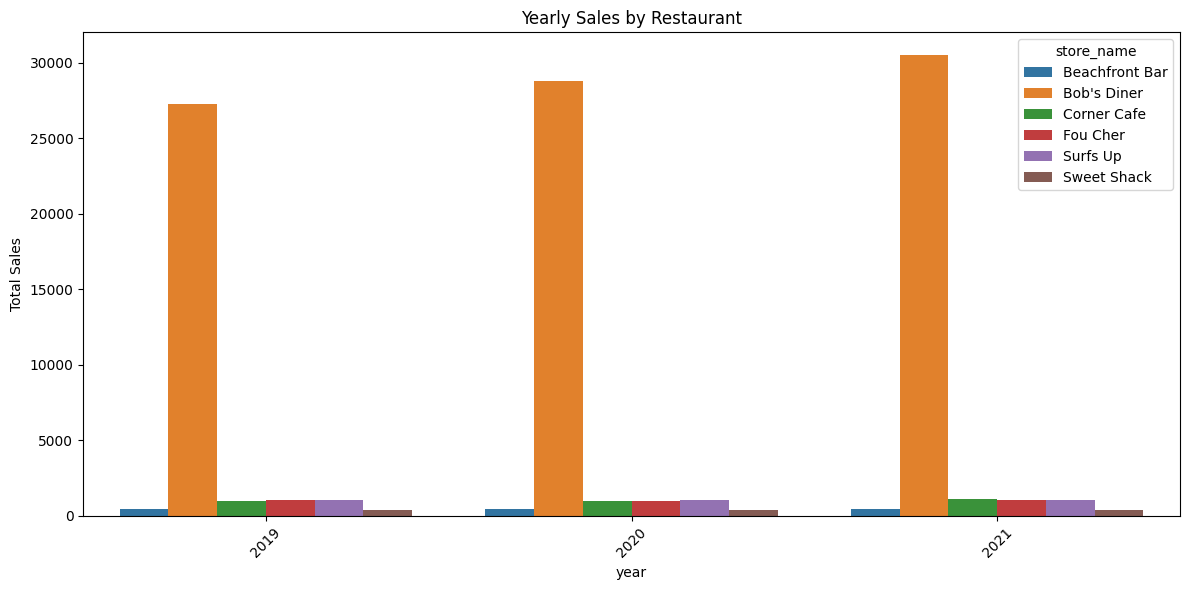

In [60]:
#Sales by Restaurant and Year

yearly_sales = final_df.groupby(['store_name', 'year'])['sales_log'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_sales, x='year', y='sales_log', hue='store_name')
plt.title('Yearly Sales by Restaurant')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


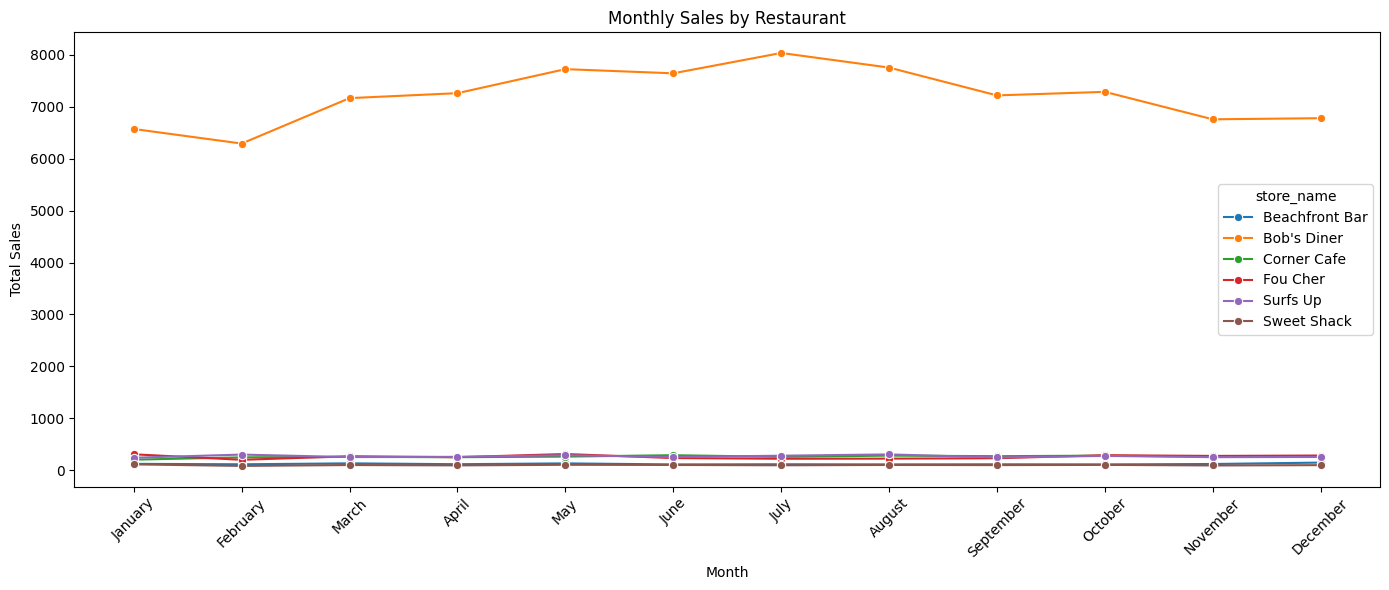

In [61]:
#Sales by Restaurant and Month
# Ensure month name exists and is ordered
final_df['month_name'] = final_df['date'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
final_df['month_name'] = pd.Categorical(final_df['month_name'], categories=month_order, ordered=True)

#monthly_sales = final_df.groupby(['store_name', 'month_name'])['sales'].sum().reset_index()
monthly_sales = final_df.groupby(['store_name', 'month_name'], observed=True)['sales_log'].sum().reset_index()


plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month_name', y='sales_log', hue='store_name', marker='o')
plt.title('Monthly Sales by Restaurant')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-62-1dfd3d8f866c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = final_df.groupby(['store_name', 'weekday'])['sales_log'].sum().reset_index()


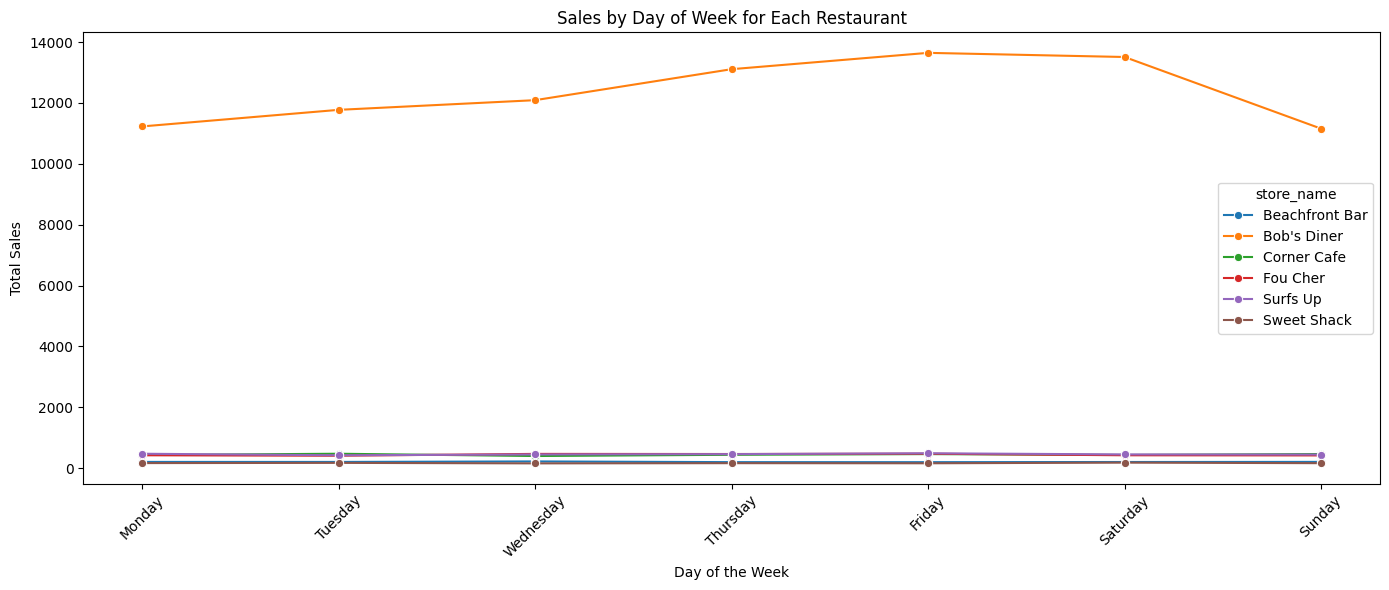

In [62]:
#Sales by Restaurant and Day of Week
# Ensure weekday exists
final_df['weekday'] = final_df['date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
final_df['weekday'] = pd.Categorical(final_df['weekday'], categories=weekday_order, ordered=True)

weekday_sales = final_df.groupby(['store_name', 'weekday'])['sales_log'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=weekday_sales, x='weekday', y='sales_log', hue='store_name', marker='o')
plt.title('Sales by Day of Week for Each Restaurant')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


f. Identify the most popular items overall and the stores where they are being sold. Also, find out the most popular item at each store

                          item_name  item_count
85               Strawberry Smoothy    236337.0
46             Frozen Milky Smoothy    103263.0
9                Amazing pork lunch     61043.0
64                    Mutton Dinner     52772.0
67                     Orange Juice     43874.0
22          Blue Ribbon Beef Entree     42774.0
4   Amazing Steak Dinner with Rolls     34439.0
88          Sweet Frozen Soft Drink     27490.0
83  Sea Bass with Vegetables Dinner     23839.0
90                  Sweet Lamb Cake     18764.0
       store_name                      item_name  item_count
0  Beachfront Bar        Fantastic Milky Smoothy      1147.0
1     Bob's Diner             Strawberry Smoothy    236337.0
2     Corner Cafe           Frozen Milky Smoothy       273.0
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch       298.0
4        Surfs Up             Awesome Soft Drink       997.0


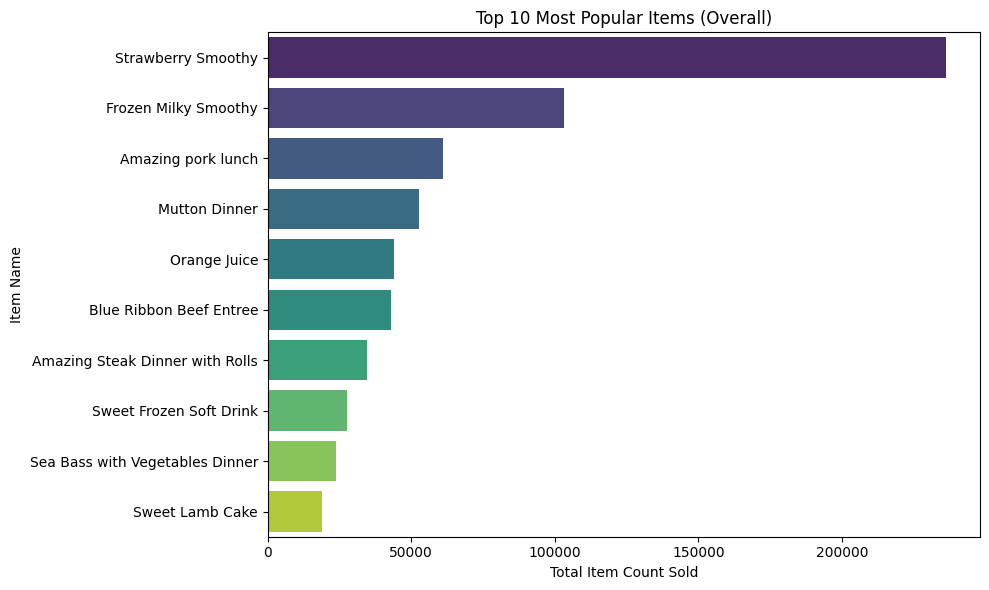

In [63]:
# Most popular items overall
popular_items = final_df.groupby('item_name')['item_count'].sum().reset_index()
popular_items = popular_items.sort_values(by='item_count', ascending=False)

print(popular_items.head(10))  # Top 10 popular items
# Stores where each item is sold
items_by_store = final_df.groupby('item_name')['store_name'].unique().reset_index()
items_by_store.columns = ['item_name', 'stores']
# Total item count per item per store
store_item_sales = final_df.groupby(['store_name', 'item_name'])['item_count'].sum().reset_index()

# Get most popular item for each store
most_popular_per_store = store_item_sales.sort_values(['store_name', 'item_count'], ascending=[True, False])
most_popular_item_each_store = most_popular_per_store.groupby('store_name').first().reset_index()

print(most_popular_item_each_store.head())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=popular_items.head(10), x='item_count', y='item_name', palette='viridis',hue='item_name')
plt.title('Top 10 Most Popular Items (Overall)')
plt.xlabel('Total Item Count Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()


g. Determine if the store with the highest sales volume is also making the most money per day

In [64]:
# Total item_count per store
store_volume = final_df.groupby('store_name')['item_count'].sum().reset_index()
store_volume = store_volume.sort_values(by='item_count', ascending=False)

top_volume_store = store_volume.iloc[0]
print(f"Store with Highest Sales Volume:\n{top_volume_store}")

# Total sales per store per day
daily_revenue = final_df.groupby(['store_name', 'date'])['sales'].sum().reset_index()

# Average daily sales per store
avg_daily_sales = daily_revenue.groupby('store_name')['sales'].mean().reset_index()
avg_daily_sales = avg_daily_sales.sort_values(by='sales', ascending=False)

top_revenue_store = avg_daily_sales.iloc[0]
print(f"Store with Highest Avg Daily Revenue:\n{top_revenue_store}")


is_same = top_volume_store['store_name'] == top_revenue_store['store_name']
print(f"\n Is the store with highest volume also making the most per day? {is_same}")



Store with Highest Sales Volume:
store_name    Bob's Diner
item_count       687527.0
Name: 1, dtype: object
Store with Highest Avg Daily Revenue:
store_name    Bob's Diner
sales         5782.185849
Name: 1, dtype: object

 Is the store with highest volume also making the most per day? True


h. Identify the most expensive item at each restaurant and find out its calorie count

In [65]:
# Get max item cost per store
max_cost_per_store = final_df.groupby('store_name')['item_cost'].max().reset_index()
print(max_cost_per_store.head())
# Merge to get item_name and kcal
most_expensive_items = pd.merge(final_df, max_cost_per_store, on=['store_name', 'item_cost'], how='inner')

# Drop duplicates
most_expensive_items = most_expensive_items[['store_name', 'item_name', 'item_cost', 'kcal']].drop_duplicates()
# Sort data for clean plot
most_expensive_items_sorted = most_expensive_items.sort_values(by='item_cost', ascending=False)
print(most_expensive_items_sorted.head())


       store_name  item_cost
0  Beachfront Bar       5.70
1     Bob's Diner      29.22
2     Corner Cafe      26.37
3        Fou Cher      53.98
4        Surfs Up      26.21
    store_name                      item_name  item_cost  kcal
5     Fou Cher  Blue Ribbon Fruity Vegi Lunch      53.98   881
0  Bob's Diner              Sweet Fruity Cake      29.22   931
2  Corner Cafe                     Pike Lunch      26.37   653
1     Surfs Up                     Steak Meal      26.21   607
4  Sweet Shack  Blue Ribbon Frozen Milky Cake       7.70   636


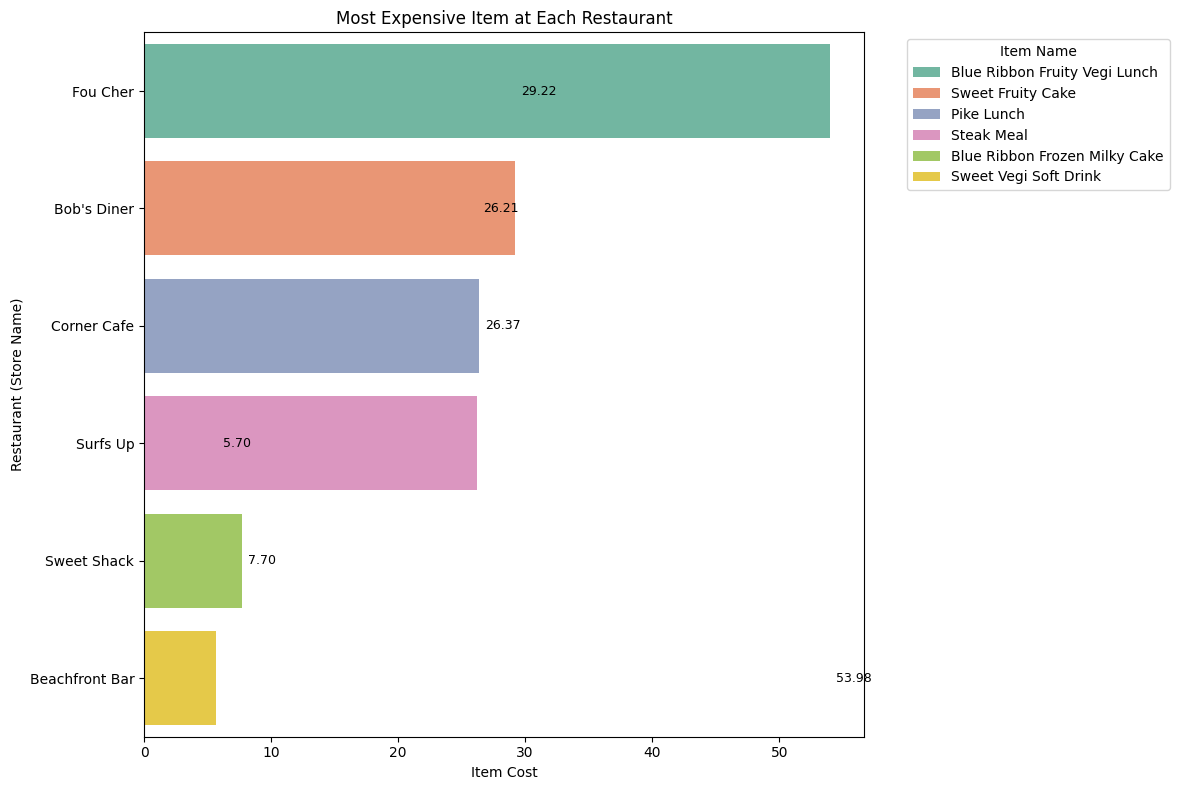

In [66]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=most_expensive_items_sorted,
    x='item_cost',
    y='store_name',
    hue='item_name',
    dodge=False,
    palette='Set2'
)

# Add value labels (item cost) to bars
for i, row in most_expensive_items_sorted.iterrows():
    plt.text(
        x=row['item_cost'] + 0.5,  # Slight offset to the right of the bar
        y=i,
        s=f"{row['item_cost']:.2f}",
        va='center',
        fontsize=9
    )

plt.title('Most Expensive Item at Each Restaurant')
plt.xlabel('Item Cost')
plt.ylabel('Restaurant (Store Name)')
plt.legend(title='Item Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Machine learning**

 **Forecasting using machine learning algorithms:**

**a. Build and compare linear regression, random forest, and XGBoost models for predictions**

        • Generate necessary features for the development of these models, like day of the week, quarter of the year, month, year, day of the month and so on
        • Use the data from the last six months as the testing data
        • Compute the root mean square error (RMSE) values for each model to compare their performances
        • Use the best-performing models to make a forecast for the next year

In [67]:
# Import packages for machine learning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor



In [68]:
# --- Assume final_df is already defined ---
df = final_df.copy()
df['date'] = pd.to_datetime(df['date'])

# Feature engineering
df['day_of_week'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

# Features and target
features = ['price', 'kcal', 'day_of_week', 'quarter', 'month', 'year', 'day', 'item_name', 'store_name']
target = 'item_count'

X = df[features]
y = df[target]

# Train-test split based on date
cutoff_date = df['date'].max() - pd.DateOffset(months=6)
train_idx = df['date'] < cutoff_date
test_idx = df['date'] >= cutoff_date

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

# Column transformers
num_features = ['price', 'kcal', 'day_of_week', 'quarter', 'month', 'year', 'day']
cat_features = ['item_name', 'store_name']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Individual pipelines for different models
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42)) # Added random_state for reproducibility
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42)) # Added random_state for reproducibility
])

# Parameter grids for tuning individual models
param_grid_lr = {}

param_grid_rf = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [None, 10]
}

param_grid_xgb = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Grid search for Linear Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring='neg_root_mean_squared_error', cv=tscv, verbose=0, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Linear Regression RMSE (CV):", -grid_search_lr.best_score_)

# Grid search for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='neg_root_mean_squared_error', cv=tscv, verbose=0, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest RMSE (CV):", -grid_search_rf.best_score_)

# Grid search for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='neg_root_mean_squared_error', cv=tscv, verbose=0, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best XGBoost RMSE (CV):", -grid_search_xgb.best_score_)

# --- Ensemble using VotingRegressor ---
estimators = [
    ('lr', best_lr),
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Create the VotingRegressor
ensemble_model = VotingRegressor(estimators=estimators, weights=[0.2, 0.4, 0.4]) # You can adjust weights
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"\nEnsemble Test RMSE: {ensemble_rmse:.4f}")

# --- Individual Best Model Evaluation on Test Set (for comparison) ---
lr_predictions = best_lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print(f"Test RMSE of Best Linear Regression: {lr_rmse:.4f}")

rf_predictions = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Test RMSE of Best Random Forest: {rf_rmse:.4f}")

xgb_predictions = best_xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"Test RMSE of Best XGBoost: {xgb_rmse:.4f}")

Best Linear Regression RMSE (CV): 18.91195306189165
Best Random Forest RMSE (CV): 17.99282685080924
Best XGBoost RMSE (CV): 16.84796455199644

Ensemble Test RMSE: 8.7556
Test RMSE of Best Linear Regression: 18.6111
Test RMSE of Best Random Forest: 6.4979
Test RMSE of Best XGBoost: 10.5298


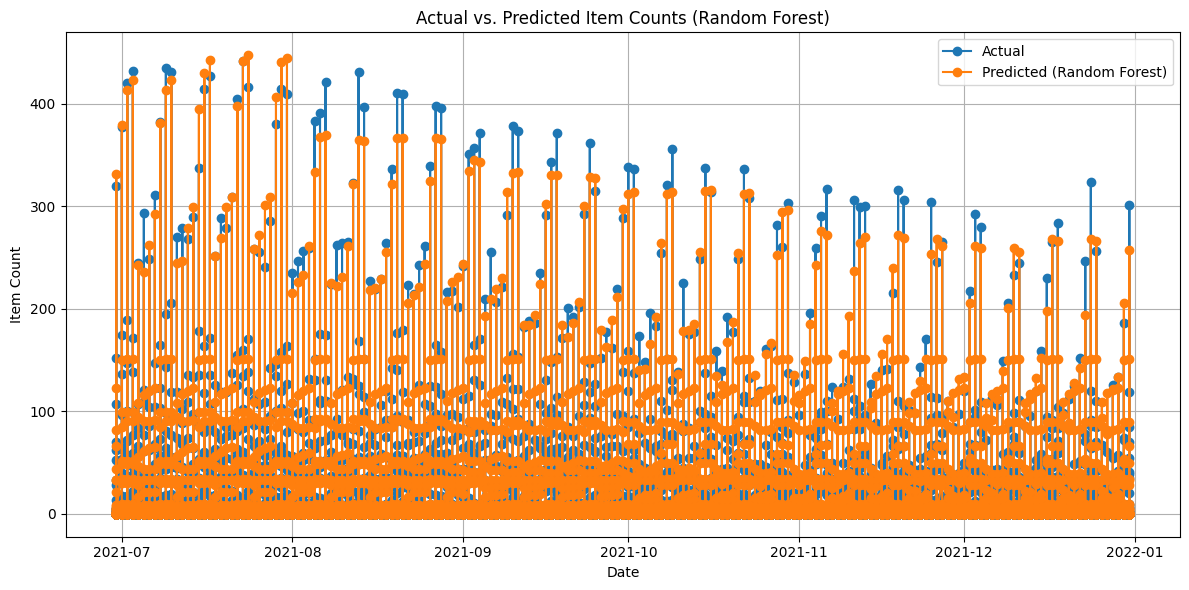

In [69]:
# --- Plotting the results for Random Forest ---
plt.figure(figsize=(12, 6))
plt.plot(df.loc[test_idx, 'date'], y_test.values, label='Actual', marker='o')
plt.plot(df.loc[test_idx, 'date'], rf_predictions, label='Predicted (Random Forest)', marker='o')
plt.title('Actual vs. Predicted Item Counts (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Item Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

best_pipeline.fit(X, y)  # Full data


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'kcal',
                                                   'day_of_week', 'quarter',
                                                   'month', 'year', 'day']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['item_name',
                                                   'store_name'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [71]:
# Future dates
future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=365)

# Use average item/store or loop through all combinations
sample_item = df['item_name'].iloc[0]
sample_store = df['store_name'].iloc[0]
avg_price = df['price'].mean()
avg_kcal = df['kcal'].mean()

future_df = pd.DataFrame({
    'price': [avg_price] * len(future_dates),
    'kcal': [avg_kcal] * len(future_dates),
    'day_of_week': future_dates.dayofweek,
    'quarter': future_dates.quarter,
    'month': future_dates.month,
    'year': future_dates.year,
    'day': future_dates.day,
    'item_name': [sample_item] * len(future_dates),
    'store_name': [sample_store] * len(future_dates)
})

# Predict
future_df['predicted_item_count'] = best_rf.predict(future_df)
future_df['predicted_item_count'] = future_df['predicted_item_count'].round().astype(int)
print(future_df[['year', 'month', 'day', 'predicted_item_count']].head())


   year  month  day  predicted_item_count
0  2022      1    1                    20
1  2022      1    2                    20
2  2022      1    3                    19
3  2022      1    4                    19
4  2022      1    5                    19


 **Forecasting using deep learning algorithms:**

    a. Use sales amount for predictions instead of item count

In [72]:
# Import packages for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from itertools import product
from tensorflow.keras.layers import  Bidirectional
import tensorflow as tf



In [73]:
df = final_df.copy()

# Feature engineering
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df = df.set_index('date')


df['lag_1'] = df['sales'].shift(1)
df['rolling_7'] = df['sales'].rolling(7).mean()
df['rolling_30'] = df['sales'].rolling(30).mean()



# Resample to daily if needed
daily_sales = df['sales'].resample('D').sum()
daily_sales = daily_sales.fillna(0)


 b. Build a long short-term memory (LSTM) model for predictions

      • Define the train and test series
      • Generate synthetic data for the last 12 months
      • Build and train an LSTM model
      • Use the model to make predictions for the test data
      c. Calculate the mean absolute percentage error (MAPE) and comment on the model's performance

c. Calculate the mean absolute percentage error (MAPE) and comment on the model's performance

In [75]:
# 1. Generate Synthetic Data for the Last 12 Months (Same as before)
np.random.seed(42)
dates = pd.to_datetime(pd.date_range(start='2024-05-14', periods=365, freq='D'))
base_sales = 100 + np.sin(np.linspace(0, 4 * np.pi, 365)) * 50  # Add some seasonality
noise = np.random.normal(0, 15, 365)
synthetic_sales = base_sales + noise
synthetic_df = pd.DataFrame({'date': dates, 'sales_amount': synthetic_sales})
synthetic_df = synthetic_df.set_index('date')
synthetic_df = synthetic_df.sort_index()

# 2. Define Train and Test Series (Same as before)
train_data = synthetic_df[:-30]
test_data = synthetic_df[-30:]

train_sales = train_data['sales_amount'].values.reshape(-1, 1)
test_sales = test_data['sales_amount'].values.reshape(-1, 1)

# 3. Scale the Data (Same as before)
scaler = MinMaxScaler()
scaler.fit(train_sales)
train_scaled = scaler.transform(train_sales)
test_scaled = scaler.transform(test_sales)

# 4. Create Sequences for LSTM (Same as before)
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 7
X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 5. Build and Train an LSTM Model (Same as before)
# Define the model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(40, 1)))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=False))  # Last LSTM layer doesn't need return_sequences
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer
#lstm_units = 64         # Number of units in the LSTM layer
#window_size = 20
#model = Sequential([
#                LSTM(lstm_units, activation='relu', input_shape=(window_size, 1)),
#                Dense(1)
#            ])


model.compile(optimizer='adam', loss='mse')

# Early stopping callback


# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=1)

# 6. Use the Model to Make Predictions for the Test Data (Same as before)
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_true, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# 8. Comment on the Model's Performance
print("\nComments on the Model's Performance:")
if mape < 5:
    print("The MAPE is very low, suggesting the model has excellent predictive accuracy on the test data.")
elif 5 <= mape < 10:
    print("The MAPE is low, indicating the model has strong predictive accuracy on the test data.")
elif 10 <= mape < 20:
    print("The MAPE is reasonable, suggesting good predictive accuracy. However, there might be room for improvement.")
elif 20 <= mape < 50:
    print("The MAPE is quite high, indicating a significant percentage error in the predictions. The model's accuracy might be limited.")
else:
    print("The MAPE is very high, suggesting the model's predictions are not very accurate.")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.2275 - val_loss: 0.0772
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1642 - val_loss: 0.0240
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0579 - val_loss: 0.0312
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0339 - val_loss: 0.0076
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0243 - val_loss: 0.0083
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0173 - val_loss: 0.0068
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - val_loss: 0.0063
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - val_loss: 0.0094
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - val_loss: 0.0082
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - val_loss: 0.0096
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

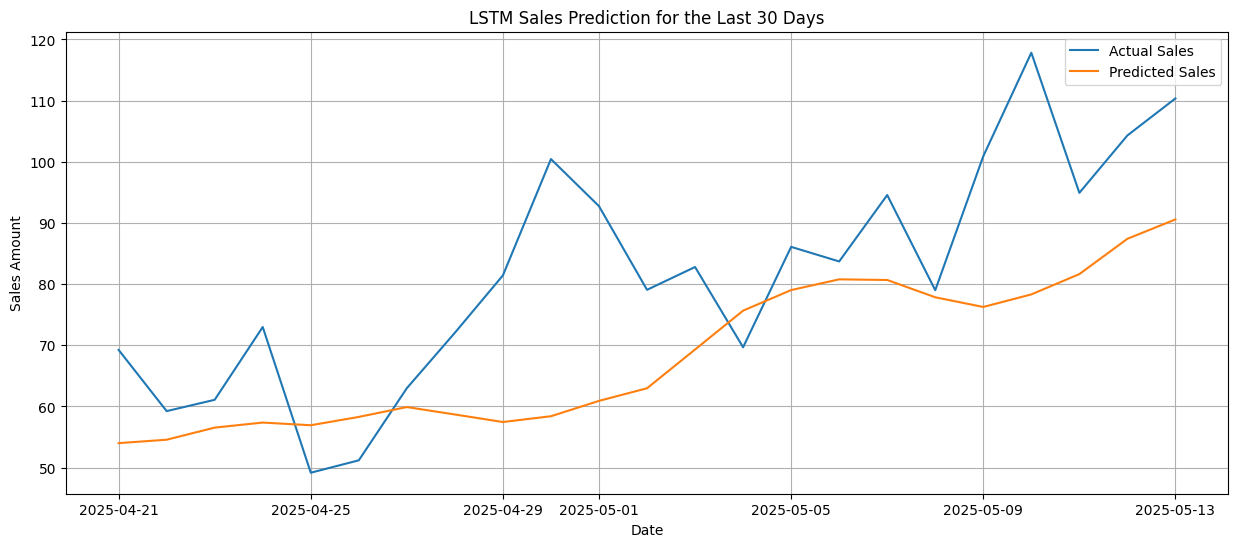

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


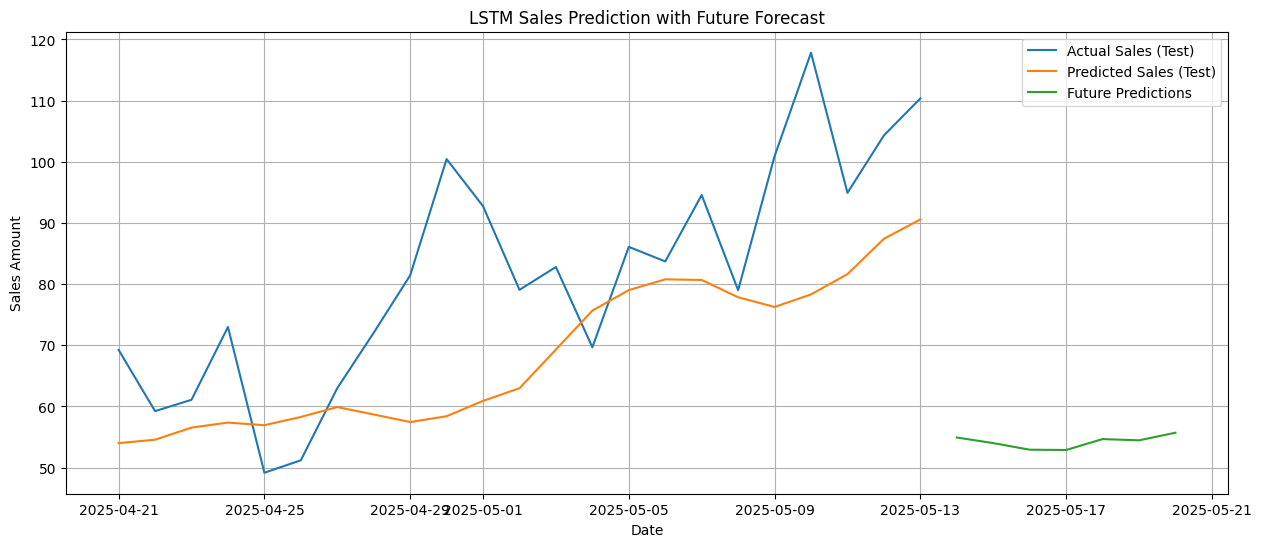


Future Predictions:
2025-05-14: 54.93
2025-05-15: 54.01
2025-05-16: 52.93
2025-05-17: 52.88
2025-05-18: 54.67
2025-05-19: 54.46
2025-05-20: 55.71


In [76]:
# 9. Visualize the Results (Same as before)
plt.figure(figsize=(15, 6))
plt.plot(test_data.index[n_steps:], y_true, label='Actual Sales')
plt.plot(test_data.index[n_steps:], y_pred, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('LSTM Sales Prediction for the Last 30 Days')
plt.legend()
plt.grid(True)
plt.show()

# To predict the next few days beyond the test set (Same as before)
last_sequence_scaled = train_scaled[-n_steps:]
last_sequence_scaled = last_sequence_scaled.reshape((1, n_steps, 1))
future_predictions_scaled = []
n_future_days = 7

for _ in range(n_future_days):
    next_day_prediction_scaled = model.predict(last_sequence_scaled)
    future_predictions_scaled.append(next_day_prediction_scaled[0, 0])
    last_sequence_scaled = np.append(last_sequence_scaled[:, 1:, :], next_day_prediction_scaled.reshape((1, 1, 1)), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))
future_dates = pd.to_datetime(pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=n_future_days))

plt.figure(figsize=(15, 6))
plt.plot(test_data.index[n_steps:], y_true, label='Actual Sales (Test)')
plt.plot(test_data.index[n_steps:], y_pred, label='Predicted Sales (Test)')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('LSTM Sales Prediction with Future Forecast')
plt.legend()
plt.grid(True)
plt.show()

print("\nFuture Predictions:")
for i in range(n_future_days):
    print(f"{future_dates[i].strftime('%Y-%m-%d')}: {future_predictions[i, 0]:.2f}")

d. Develop another model using the entire series for training, and use it to forecast for the next three months

In [77]:

# 2. Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

# 3. Create sequences
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# 4. Define parameter grid
window_sizes = [10, 20, 30, 40]  # Different window sizes to test
lstm_units_list = [[32, 16], [64, 32], [128, 64]]  # Different LSTM unit configurations
use_bidirectional = [True] # Test with and without Bidirectional LSTM


# 5. Iterate through parameters
best_rmse = float('inf')
best_mape = float('inf')
best_window_size = None
best_lstm_units = None
best_model = None
best_bidirectional = False

for window_size, lstm_units, bidirectional in product(window_sizes, lstm_units_list, use_bidirectional):
    print(f"\nTraining with window size: {window_size}, LSTM units: {lstm_units}, Bidirectional: {bidirectional}")
    # Create sequences
    X, y = create_sequences(scaled_data, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # 6. Build and train LSTM model
    # Model definition
    model = Sequential()

    model.add(Bidirectional(LSTM(lstm_units[0], return_sequences=True, input_shape=(window_size, 1))))

    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Bidirectional(LSTM(lstm_units[1])))

    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='loss',  # Stop when training loss stops improving
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Fit the model using the entire dataset
    history = model.fit(
        X, y,
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0  # Reduced verbosity for cleaner output
    )

    # 7. Forecast the next 90 days
    forecast_steps = 90
    last_sequence = scaled_data[-window_size:].copy()
    forecast = []
    for _ in range(forecast_steps):
        input_seq = last_sequence.reshape(1, window_size, 1)
        next_val = model.predict(input_seq, verbose=0)[0][0]  # Suppress prediction verbosity
        forecast.append(next_val)
        last_sequence = np.append(last_sequence, next_val)[-window_size:]

    # 8. Inverse scale forecast
    forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    # 9. Evaluate the model
    # Calculate RMSE and MAPE
    actual_values = daily_sales[-forecast_steps:].values
    predicted_values = forecast_rescaled.flatten()
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    mape = mean_absolute_percentage_error(actual_values, predicted_values)

    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}')

    # 10. Calculate average sales for comparison
    average_sales = daily_sales.mean()
    print(f'Average Sales: {average_sales:.2f}')

    # 11. Determine if this is the best model so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_mape = mape
        best_window_size = window_size
        best_lstm_units = lstm_units
        best_model = model  # save the model
        best_bidirectional = bidirectional

print("\nBest Model Parameters:")
print(f"Window Size: {best_window_size}")
print(f"LSTM Units: {best_lstm_units}")
print(f"Bidirectional: {best_bidirectional}")
print(f"Best RMSE: {best_rmse:.2f}")
print(f"Best MAPE: {best_mape:.2f}")



Training with window size: 10, LSTM units: [32, 16], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 79.
RMSE: 2612.38
MAPE: 0.48
Average Sales: 5842.83

Training with window size: 10, LSTM units: [64, 32], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 55.
RMSE: 3019.72
MAPE: 0.59
Average Sales: 5842.83

Training with window size: 10, LSTM units: [128, 64], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 82: early stopping
Restoring model weights from the end of the best epoch: 72.
RMSE: 1547.96
MAPE: 0.24
Average Sales: 5842.83

Training with window size: 20, LSTM units: [32, 16], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 75: early stopping
Restoring model weights from the end of the best epoch: 65.
RMSE: 3019.63
MAPE: 0.53
Average Sales: 5842.83

Training with window size: 20, LSTM units: [64, 32], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 62: early stopping
Restoring model weights from the end of the best epoch: 52.
RMSE: 1599.50
MAPE: 0.29
Average Sales: 5842.83

Training with window size: 20, LSTM units: [128, 64], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 100.
RMSE: 2238.02
MAPE: 0.41
Average Sales: 5842.83

Training with window size: 30, LSTM units: [32, 16], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 60.
RMSE: 2364.62
MAPE: 0.35
Average Sales: 5842.83

Training with window size: 30, LSTM units: [64, 32], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 79: early stopping
Restoring model weights from the end of the best epoch: 69.
RMSE: 2710.21
MAPE: 0.46
Average Sales: 5842.83

Training with window size: 30, LSTM units: [128, 64], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 82: early stopping
Restoring model weights from the end of the best epoch: 72.
RMSE: 2480.13
MAPE: 0.50
Average Sales: 5842.83

Training with window size: 40, LSTM units: [32, 16], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 100.
RMSE: 2095.59
MAPE: 0.44
Average Sales: 5842.83

Training with window size: 40, LSTM units: [64, 32], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 88: early stopping
Restoring model weights from the end of the best epoch: 78.
RMSE: 2294.17
MAPE: 0.44
Average Sales: 5842.83

Training with window size: 40, LSTM units: [128, 64], Bidirectional: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 100.
RMSE: 2458.02
MAPE: 0.39
Average Sales: 5842.83

Best Model Parameters:
Window Size: 10
LSTM Units: [128, 64]
Bidirectional: True
Best RMSE: 1547.96
Best MAPE: 0.24


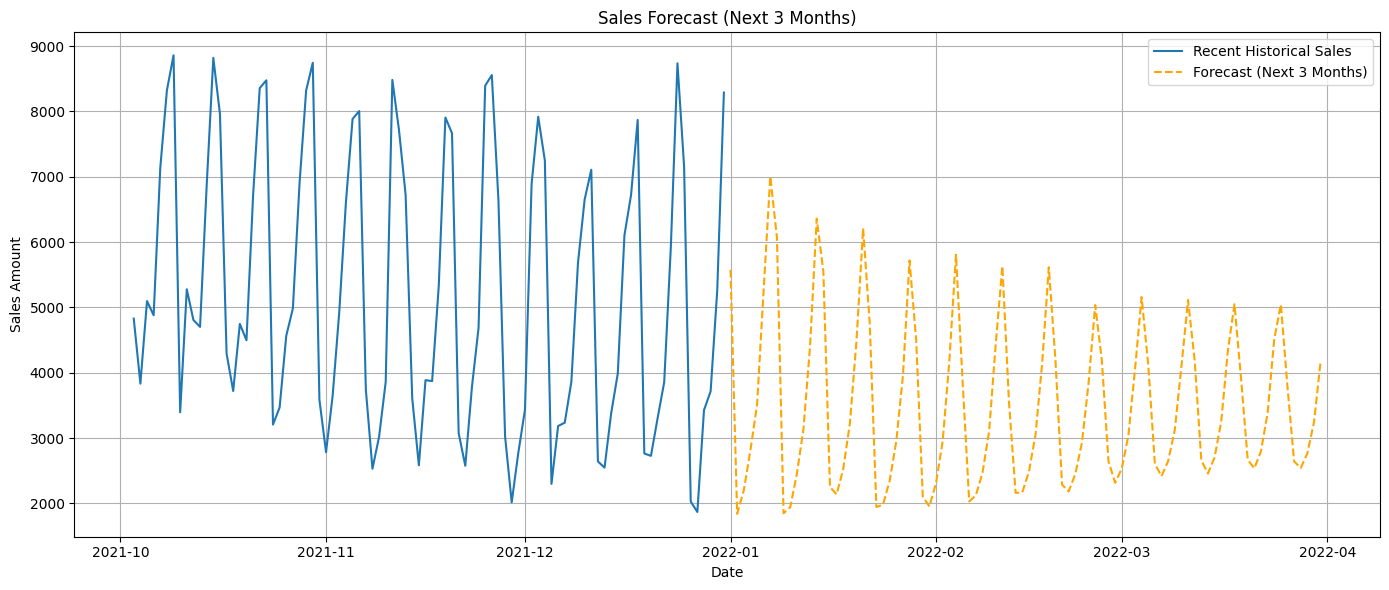

In [78]:
# 13. Plot the results using the best model
# 7. Build forecast DataFrame (using best parameters)
last_date = daily_sales.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'forecast': forecast_rescaled.flatten()}, index=forecast_dates)

# 8. Plot results
plt.figure(figsize=(14, 6))
plt.plot(daily_sales[-90:], label='Recent Historical Sales')
plt.plot(forecast_df, label='Forecast (Next 3 Months)', linestyle='--', color='orange')
plt.title('Sales Forecast (Next 3 Months)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()